In [30]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

In [31]:
# Load the data
# 5 pub/subs
_5sub_5pub_dht_node_1 = pd.read_csv('csv/5sub_5pub_dht_node1_results.csv')
_5sub_5pub_dht_node_2 = pd.read_csv('csv/5sub_5pub_dht_node2_results.csv')
_5sub_5pub_dht_node_3 = pd.read_csv('csv/5sub_5pub_dht_node3_results.csv')

# 8 pub/subs
_8sub_8pub_dht_node_1 = pd.read_csv('csv/8sub_8pub_dht_node1_results.csv')
_8sub_8pub_dht_node_2 = pd.read_csv('csv/8sub_8pub_dht_node2_results.csv')
_8sub_8pub_dht_node_3 = pd.read_csv('csv/8sub_8pub_dht_node3_results.csv')


# 12 pubs/subs
_12sub_12pub_dht_node_1 = pd.read_csv('csv/12sub_12pub_dht_node1_results.csv')
_12sub_12pub_dht_node_2 = pd.read_csv('csv/12sub_12pub_dht_node2_results.csv')
_12sub_12pub_dht_node_3 = pd.read_csv('csv/12sub_12pub_dht_node3_results.csv')


In [32]:
_5sub_5pub_dht_node_1.head()

,latency
0,42.315743
1,55.683748
2,26.019499
3,55.239881
4,35.296383


In [33]:
# Build the list of latency values
latencyList = [_5sub_5pub_dht_node_1['latency'], _5sub_5pub_dht_node_2['latency'], _5sub_5pub_dht_node_3['latency'], _8sub_8pub_dht_node_1['latency'],
              _8sub_8pub_dht_node_2['latency'], _8sub_8pub_dht_node_3['latency'], _12sub_12pub_dht_node_1['latency'], _12sub_12pub_dht_node_2['latency'],
              _12sub_12pub_dht_node_3['latency']]



In [35]:
# latencyList

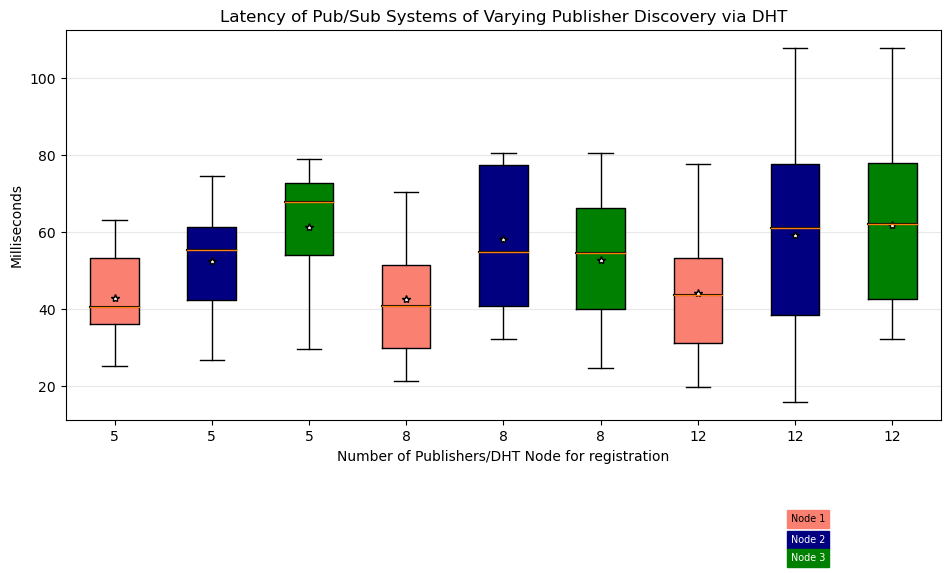

In [43]:
# Build X axis labels
# LOGIC TAKEN FROM https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html
labels = ['5', '5', '5', '8', '8', '8', '12', '12', '12']

fig, ax1 = plt.subplots(figsize=(10, 6))
fig.canvas.manager.set_window_title('A Boxplot Example')
fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = ax1.boxplot(latencyList, notch=False, sym='+', vert=True, whis=1.5, labels=labels)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set(
    axisbelow=True,  # Hide the grid behind plot objects
    title='Latency of Pub/Sub Systems of Varying Publisher Discovery via DHT',
    xlabel='Number of Publishers/DHT Node for registration',
    ylabel='Milliseconds',
)

box_colors = ['salmon', 'navy', 'green']
num_boxes = len(latencyList)
medians = np.empty(num_boxes)
for i in range(num_boxes):
    box = bp['boxes'][i]
    box_x = []
    box_y = []
    for j in range(5):
        box_x.append(box.get_xdata()[j])
        box_y.append(box.get_ydata()[j])
    box_coords = np.column_stack([box_x, box_y])
    # Alternate between Dark Khaki and Royal Blue
    ax1.add_patch(Polygon(box_coords, facecolor=box_colors[i % 3]))
    # Now draw the median lines back over what we just filled in
    med = bp['medians'][i]
    median_x = []
    median_y = []
    for j in range(2):
        median_x.append(med.get_xdata()[j])
        median_y.append(med.get_ydata()[j])
        ax1.plot(median_x, median_y, 'k')
    medians[i] = median_y[0]
    # Finally, overplot the sample averages, with horizontal alignment
    # in the center of each box
    ax1.plot(np.average(med.get_xdata()), np.average(latencyList[i]),
             color='w', marker='*', markeredgecolor='k')
    
fig.text(0.80, 0.08, 'Node 1',
         backgroundcolor=box_colors[0], color='black', weight='roman',
         size='x-small')
fig.text(0.80, 0.045, 'Node 2',
         backgroundcolor=box_colors[1],
         color='white', weight='roman', size='x-small')
fig.text(0.80, 0.015, 'Node 3',
         backgroundcolor=box_colors[2],
         color='white', weight='roman', size='x-small')

plt.show()